## Divya Nallawar
### Student ID: 110988624

# Application of Statistical MOdelling Techniques on a Fashion related Dataset

This project focuses on understanding and applying different statistical models on a dataset. The dataset that I am using is obtained from Kaggle. This dataset was collected simply to learn the different trends in the fashion.


In [1]:
# Loading all the packages that would be used over the project
library(tidyverse)
library(caret)
library(corrplot)
library(readr)
library(dplyr)
library(tidyr)
library(lmtest)
library(car)
library(leaps)
library(MASS)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


corrplot 0.92 loaded

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: 'car'


The following object is masked from 

In [2]:
# Here to fetch the data, one more possible way is to use the Kaggle API to fetch the data. But here, we have downloaded the file directly from kaggle and using it.
# Read the downloaded CSV file
myntra_fashion_dataset <- read_csv("./Myntra_Fasion_Clothing.csv", col_types = cols(DiscountOffer = col_character()))
print(head(myntra_fashion_dataset))

# A tibble: 6 × 13
  URL       Product_id BrandName Category Individual_category category_by_Gender
  <chr>          <dbl> <chr>     <chr>    <chr>               <chr>             
1 https://…    2296012 Roadster  Bottom … jeans               Men               
2 https://…   13780156 LOCOMOTI… Bottom … track-pants         Men               
3 https://…   11895958 Roadster  Topwear  shirts              Men               
4 https://…    4335679 Zivame    Lingeri… shapewear           Women             
5 https://…   11690882 Roadster  Western  tshirts             Women             
6 https://…    2490950 Mast & H… Western  tops                Women             
# ℹ 7 more variables: Description <chr>, `DiscountPrice (in Rs)` <dbl>,
#   `OriginalPrice (in Rs)` <dbl>, DiscountOffer <chr>, SizeOption <chr>,
#   Ratings <dbl>, Reviews <dbl>


In [3]:
colnames(myntra_fashion_dataset) # Fetching the column name from the dataset

[1] "URL"                   "Product_id"            "BrandName"            
 [4] "Category"              "Individual_category"   "category_by_Gender"   
 [7] "Description"           "DiscountPrice (in Rs)" "OriginalPrice (in Rs)"
[10] "DiscountOffer"         "SizeOption"            "Ratings"              
[13] "Reviews"

In [4]:
summary(myntra_fashion_dataset) # let's look at the summary of the dataset before permoring any datacleaning

     URL              Product_id        BrandName           Category        
 Length:526564      Min.   :   27399   Length:526564      Length:526564     
 Class :character   1st Qu.:13880530   Class :character   Class :character  
 Mode  :character   Median :15971057   Mode  :character   Mode  :character  
                    Mean   :15069387                                        
                    3rd Qu.:17347414                                        
                    Max.   :18464352                                        
                                                                            
 Individual_category category_by_Gender Description       
 Length:526564       Length:526564      Length:526564     
 Class :character    Class :character   Class :character  
 Mode  :character    Mode  :character   Mode  :character  
                                                          
                                                          
                              

In [5]:
missing_counts <- colSums(is.na(myntra_fashion_dataset))
print(missing_counts)


                  URL            Product_id             BrandName 
                    0                     0                     0 
             Category   Individual_category    category_by_Gender 
                    0                     0                     0 
          Description DiscountPrice (in Rs) OriginalPrice (in Rs) 
                    0                193158                     0 
        DiscountOffer            SizeOption               Ratings 
                74306                     0                336152 
              Reviews 
               336152 


Here, we can see that there are a lot of missing values in the dataset, specifically for columns namely `DiscountPrice (in Rs)`, `DiscountOffer`, `Ratings` and `Reviews`.
Let's fix the missing values.

In [6]:
str(myntra_fashion_dataset)

spc_tbl_ [526,564 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ URL                  : chr [1:526564] "https://www.myntra.com/jeans/roadster/roadster-men-navy-blue-slim-fit-mid-rise-clean-look-jeans/2296012/buy" "https://www.myntra.com/track-pants/locomotive/locomotive-men-black--white-solid-slim-fit-track-pants/13780156/buy" "https://www.myntra.com/shirts/roadster/roadster-men-navy-white--black-geometric-printed-sustainable-casual-shirt/11895958/buy" "https://www.myntra.com/shapewear/zivame/zivame-women-black-saree-shapewear-zi3023core0nude/4335679/buy" ...
 $ Product_id           : num [1:526564] 2296012 13780156 11895958 4335679 11690882 ...
 $ BrandName            : chr [1:526564] "Roadster" "LOCOMOTIVE" "Roadster" "Zivame" ...
 $ Category             : chr [1:526564] "Bottom Wear" "Bottom Wear" "Topwear" "Lingerie & Sleep Wear" ...
 $ Individual_category  : chr [1:526564] "jeans" "track-pants" "shirts" "shapewear" ...
 $ category_by_Gender   : chr [1:526564] "Men" "Men" "Men" "

# Part A : Data Cleaning

Here, we are cleaning our data, like removing the special characters from the dataset, filling the missing values, etc.

In [7]:
# Replace missing DiscountOffer values with 0
myntra_fashion_dataset$DiscountOffer <- ifelse(is.na(myntra_fashion_dataset$DiscountOffer), 0, myntra_fashion_dataset$DiscountOffer)


In [8]:
# Remove non-numeric characters from DiscountOffer and calculate discount percentage
myntra_fashion_dataset$DiscountOffer <- gsub("[^0-9]", "", myntra_fashion_dataset$DiscountOffer)
myntra_fashion_dataset$DiscountOffer <- as.numeric(myntra_fashion_dataset$DiscountOffer) / myntra_fashion_dataset$`OriginalPrice (in Rs)` * 100


In [9]:
# Handle missing values for 'DiscountPrice (in Rs)'
mask <- !is.na(myntra_fashion_dataset$`DiscountPrice (in Rs)`) & !is.na(myntra_fashion_dataset$`OriginalPrice (in Rs)`) & is.na(myntra_fashion_dataset$DiscountOffer)
myntra_fashion_dataset$DiscountOffer[mask] <- (myntra_fashion_dataset$`OriginalPrice (in Rs)`[mask] - myntra_fashion_dataset$`DiscountPrice (in Rs)`[mask]) / myntra_fashion_dataset$`OriginalPrice (in Rs)`[mask] * 100


In [10]:
# Calculate missing 'DiscountPrice (in Rs)' from 'DiscountOffer' and 'OriginalPrice (in Rs)'
mask <- !is.na(myntra_fashion_dataset$DiscountOffer) & !is.na(myntra_fashion_dataset$`OriginalPrice (in Rs)`) & is.na(myntra_fashion_dataset$`DiscountPrice (in Rs)`)
myntra_fashion_dataset$`DiscountPrice (in Rs)`[mask] <- myntra_fashion_dataset$`OriginalPrice (in Rs)`[mask] * (1 - myntra_fashion_dataset$DiscountOffer[mask] / 100)


In [11]:
# Set missing values to 0 if both 'DiscountPrice (in Rs)' and 'DiscountOffer' are missing
mask <- is.na(myntra_fashion_dataset$`DiscountPrice (in Rs)`) & is.na(myntra_fashion_dataset$DiscountOffer)
myntra_fashion_dataset$`DiscountPrice (in Rs)`[mask] <- 0
myntra_fashion_dataset$DiscountOffer[mask] <- 0


In [12]:
# Fill missing 'Ratings' and 'Reviews' with their mean values
myntra_fashion_dataset$Ratings <- ifelse(is.na(myntra_fashion_dataset$Ratings), mean(myntra_fashion_dataset$Ratings, na.rm = TRUE), myntra_fashion_dataset$Ratings)
myntra_fashion_dataset$Reviews <- ifelse(is.na(myntra_fashion_dataset$Reviews), mean(myntra_fashion_dataset$Reviews, na.rm = TRUE), myntra_fashion_dataset$Reviews)


Let's remove the unnecessary columns. (`URL,SizeOption, Description`)

In [13]:
myntra_fashion_dataset = subset(myntra_fashion_dataset, select = -c(URL,SizeOption, Description) ) 
head(myntra_fashion_dataset)

Product_id,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,Ratings,Reviews
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2296012,Roadster,Bottom Wear,jeans,Men,824,1499,3.002001,3.9,999
13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,517,1149,4.786771,4.0,999
11895958,Roadster,Topwear,shirts,Men,629,1399,3.931380,4.3,999
4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,893,1295,2.393822,4.2,999
11690882,Roadster,Western,tshirts,Women,564,599,5.843072,4.2,999
2490950,Mast & Harbour,Western,tops,Women,559,599,6.677796,4.4,999


In [14]:
missing_counts <- colSums(is.na(myntra_fashion_dataset)) # checking for the missing value count
print(missing_counts)


           Product_id             BrandName              Category 
                    0                     0                     0 
  Individual_category    category_by_Gender DiscountPrice (in Rs) 
                    0                     0                     0 
OriginalPrice (in Rs)         DiscountOffer               Ratings 
                    0                     0                     0 
              Reviews 
                    0 


In [15]:
sum(is.na(myntra_fashion_dataset$'OriginalPrice (in Rs)'))

[1] 0

Here we can see that all the missing values has been handled. Now the data can be used for understanding statistical modelling techniques.


In [16]:
colnames(myntra_fashion_dataset)[6] <- c('DiscountPrice') # changing the column names for convinence
colnames(myntra_fashion_dataset)[7] <- c('OriginalPrice') 

In [17]:
missing_counts <- colSums(is.na(myntra_fashion_dataset))
print(missing_counts)


         Product_id           BrandName            Category Individual_category 
                  0                   0                   0                   0 
 category_by_Gender       DiscountPrice       OriginalPrice       DiscountOffer 
                  0                   0                   0                   0 
            Ratings             Reviews 
                  0                   0 


In [18]:
summary(myntra_fashion_dataset)

   Product_id        BrandName           Category         Individual_category
 Min.   :   27399   Length:526564      Length:526564      Length:526564      
 1st Qu.:13880530   Class :character   Class :character   Class :character   
 Median :15971057   Mode  :character   Mode  :character   Mode  :character   
 Mean   :15069387                                                            
 3rd Qu.:17347414                                                            
 Max.   :18464352                                                            
 category_by_Gender DiscountPrice   OriginalPrice   DiscountOffer   
 Length:526564      Min.   :   99   Min.   :   99   Min.   : 0.000  
 Class :character   1st Qu.:  736   1st Qu.: 1299   1st Qu.: 1.000  
 Mode  :character   Median : 1169   Median : 1999   Median : 2.155  
                    Mean   : 1507   Mean   : 2414   Mean   : 3.911  
                    3rd Qu.: 1890   3rd Qu.: 2899   3rd Qu.: 3.339  
                    Max.   :90000   Max.

### Converting categorical data to Numerical Data
We do have some categorical data in our dataset. Like the Gender category, this colummn only has `Men` and `Women` as its unique values. We can convert them to numerical data. Here we will be assigning `Men` as $0$ and `Women` as $1$.

In [19]:
gender_category <- unique(myntra_fashion_dataset$category_by_Gender)
gender_category <- length(gender_category)
gender_category

[1] 2

In [20]:

myntra_fashion_dataset <- myntra_fashion_dataset %>%
  mutate(category_by_Gender = if_else(category_by_Gender == "Men", 0, 1))

Here, we have 8 unique values for the category variable. We can convert this into numerical data and use it for statistical analysis

In [21]:
unique_value_category <- unique(myntra_fashion_dataset$Category)
unique_no <- length(unique_value_category)
unique_no
unique_value_category

[1] 8

[1] "Bottom Wear"              "Topwear"                 
[3] "Lingerie & Sleep Wear"    "Western"                 
[5] "Sports Wear"              "Indian Wear"             
[7] "Plus Size"                "Inner Wear &  Sleep Wear"

In [22]:
myntra_fashion_dataset$Category <- as.numeric(factor(myntra_fashion_dataset$Category, levels = c('Bottom Wear','Topwear','Lingerie & Sleep Wear','Western','Sports Wear','Indian Wear','Plus Size','Inner Wear &  Sleep Wear')))

head(myntra_fashion_dataset$Category) # here the 8 unique categories has been  converted to 1-8 numerical

[1] 1 1 2 3 4 4

### Dataset division into training and test dataset

In [23]:
# Dividing our dataset into training and test set
set.seed(1111)
n = floor(0.8 * nrow(myntra_fashion_dataset)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(myntra_fashion_dataset)), size = n) #randomly sample indicies to be included in the training set

train = myntra_fashion_dataset[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = myntra_fashion_dataset[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")  
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.")  

There are 421251 rows and 10 columns in the training set. There are 105313 rows and 10 columns in the testing set.

In [24]:
str(train)

tibble [421,251 × 10] (S3: tbl_df/tbl/data.frame)
 $ Product_id         : num [1:421251] 14737378 17702838 17225968 10182339 17422112 ...
 $ BrandName          : chr [1:421251] "Mr Bowerbird" "ATTIITUDE" "Jinfo" "Style Quotient" ...
 $ Category           : num [1:421251] 2 2 6 4 6 4 3 7 2 8 ...
 $ Individual_category: chr [1:421251] "tshirts" "tshirts" "palazzos" "tops" ...
 $ category_by_Gender : num [1:421251] 0 0 1 1 1 1 1 1 0 0 ...
 $ DiscountPrice      : num [1:421251] 499 779 1049 1535 1880 ...
 $ OriginalPrice      : num [1:421251] 999 1299 2498 1599 3760 ...
 $ DiscountOffer      : num [1:421251] 5.01 3.08 2.32 4 1.33 ...
 $ Ratings            : num [1:421251] 4.7 4.09 4.09 4.2 4.09 ...
 $ Reviews            : num [1:421251] 28 62 62 272 62 ...


Here, we are creating a subset of our training dataset and including just the numerical data

In [25]:
myntra_fashion_subset <- subset(train, select = -c(Product_id, BrandName, Individual_category))
head(myntra_fashion_subset)

Category,category_by_Gender,DiscountPrice,OriginalPrice,DiscountOffer,Ratings,Reviews
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0,499,999,5.005005,4.700000,28.00000
2,0,779,1299,3.079292,4.094892,61.99082
6,1,1049,2498,2.321857,4.094892,61.99082
4,1,1535,1599,4.002502,4.200000,272.00000
6,1,1880,3760,1.329787,4.094892,61.99082
4,1,949,999,5.005005,4.600000,13.00000


### Correlation matrix
Let's create a correlation matrix to understand the dependency of each feature on one another.

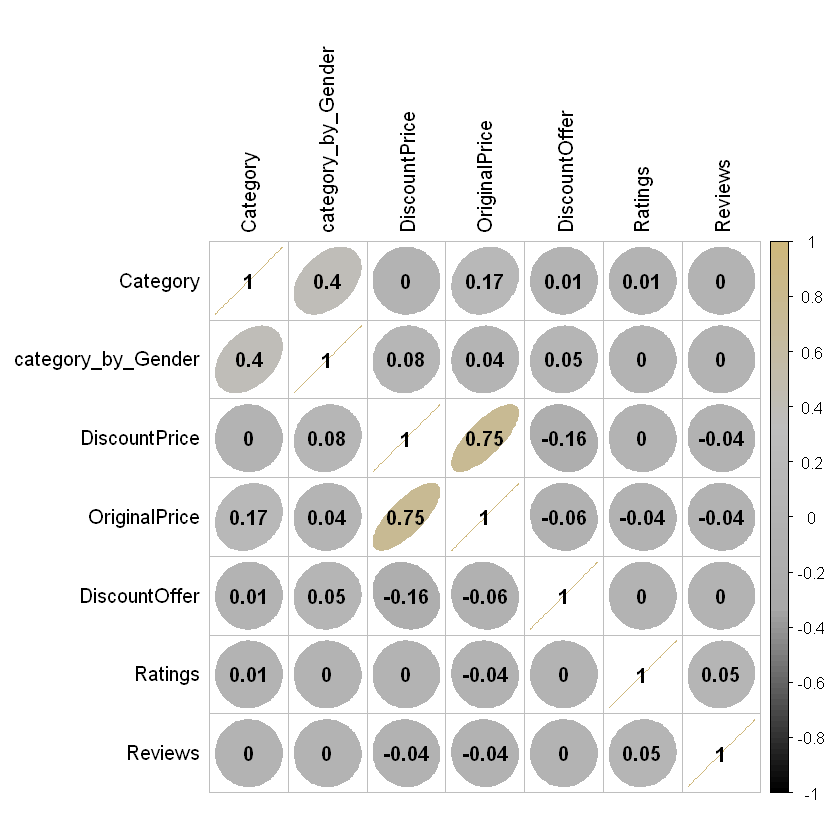

In [26]:
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(myntra_fashion_subset[]), method = "ellipse", col = col4(100),  addCoef.col = "black", tl.col = "black")

From the correlation matrix, we can say that there is a high correlation between the `OriginalPrice` and `DiscountPrice`

# Part B: Regression Modelling

Let's perform linear regression on our training dataset with numerical features. We will be using `DiscountPrice` as out response variable and all other features as predictor variables

In [27]:
lm_myntra <- lm(DiscountPrice ~., data = myntra_fashion_subset)
summary(lm_myntra)


Call:
lm(formula = DiscountPrice ~ ., data = myntra_fashion_subset)

Residuals:
   Min     1Q Median     3Q    Max 
-15135   -436    -39    408  42672 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.719e+02  1.761e+01    9.76   <2e-16 ***
Category           -1.253e+02  7.271e-01 -172.34   <2e-16 ***
category_by_Gender  3.491e+02  2.845e+00  122.71   <2e-16 ***
OriginalPrice       5.237e-01  6.634e-04  789.46   <2e-16 ***
DiscountOffer      -1.577e+01  1.319e-01 -119.58   <2e-16 ***
Ratings             1.061e+02  4.221e+00   25.14   <2e-16 ***
Reviews            -1.748e-01  1.658e-02  -10.54   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 810.5 on 421244 degrees of freedom
Multiple R-squared:  0.6106,	Adjusted R-squared:  0.6106 
F-statistic: 1.101e+05 on 6 and 421244 DF,  p-value: < 2.2e-16


`lm_myntra` is the linear regression model with `DiscountPrice` as the response variable and all other are the predictor variable. 

From the summary output we can see that all the features from out dataset seems to be relevant for the model to be a good fit. Considering  significance value as $\alpha = 0.05$, the P-value for all the features seems to be less than the considered significance value. But let's not conclude now, we can go ahead and use our model selection techniques to understand which size of feature is the best fit for the model.

# Part C: Backward Selection and Diagnostics of model

Let's perform backward selection process to see which size of features is the best fit.

Removing one feature from the model and analyze.

In [28]:
updated_lm_myntra = update(lm_myntra, . ~ . -Category)
summary(updated_lm_myntra)


Call:
lm(formula = DiscountPrice ~ category_by_Gender + OriginalPrice + 
    DiscountOffer + Ratings + Reviews, data = myntra_fashion_subset)

Residuals:
   Min     1Q Median     3Q    Max 
-14568   -415    -40    402  44217 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.338e+02  1.813e+01   -7.38 1.58e-13 ***
category_by_Gender  1.550e+02  2.703e+00   57.33  < 2e-16 ***
OriginalPrice       5.042e-01  6.763e-04  745.52  < 2e-16 ***
DiscountOffer      -1.582e+01  1.365e-01 -115.87  < 2e-16 ***
Ratings             9.698e+01  4.367e+00   22.21  < 2e-16 ***
Reviews            -1.918e-01  1.716e-02  -11.18  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 838.6 on 421245 degrees of freedom
Multiple R-squared:  0.5832,	Adjusted R-squared:  0.5832 
F-statistic: 1.179e+05 on 5 and 421245 DF,  p-value: < 2.2e-16


Here we removed the `Category` feature to see if this model is a a best fit or not. The `update model` still says all the features seems good. Using a significance value as $\alpha = 0.05$, the P-value for all the features seems to be less than the considered significance value.

In [29]:
updated_lm_myntra_2 = update(updated_lm_myntra, . ~ . -category_by_Gender)
summary(updated_lm_myntra_2)


Call:
lm(formula = DiscountPrice ~ OriginalPrice + DiscountOffer + 
    Ratings + Reviews, data = myntra_fashion_subset)

Residuals:
   Min     1Q Median     3Q    Max 
-14571   -428    -63    416  44133 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   -4.063e+01  1.813e+01   -2.242    0.025 *  
OriginalPrice  5.058e-01  6.783e-04  745.644   <2e-16 ***
DiscountOffer -1.541e+01  1.368e-01 -112.617   <2e-16 ***
Ratings        9.722e+01  4.384e+00   22.178   <2e-16 ***
Reviews       -1.909e-01  1.723e-02  -11.080   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 841.8 on 421246 degrees of freedom
Multiple R-squared:  0.5799,	Adjusted R-squared:  0.5799 
F-statistic: 1.454e+05 on 4 and 421246 DF,  p-value: < 2.2e-16


I went ahead with updating our model by removing the `category_by_gender` feature. Although after removing certain features, we can see that all the features still seems to be the best fits for a model 

Now Let's plot the diagnostics plot for our model

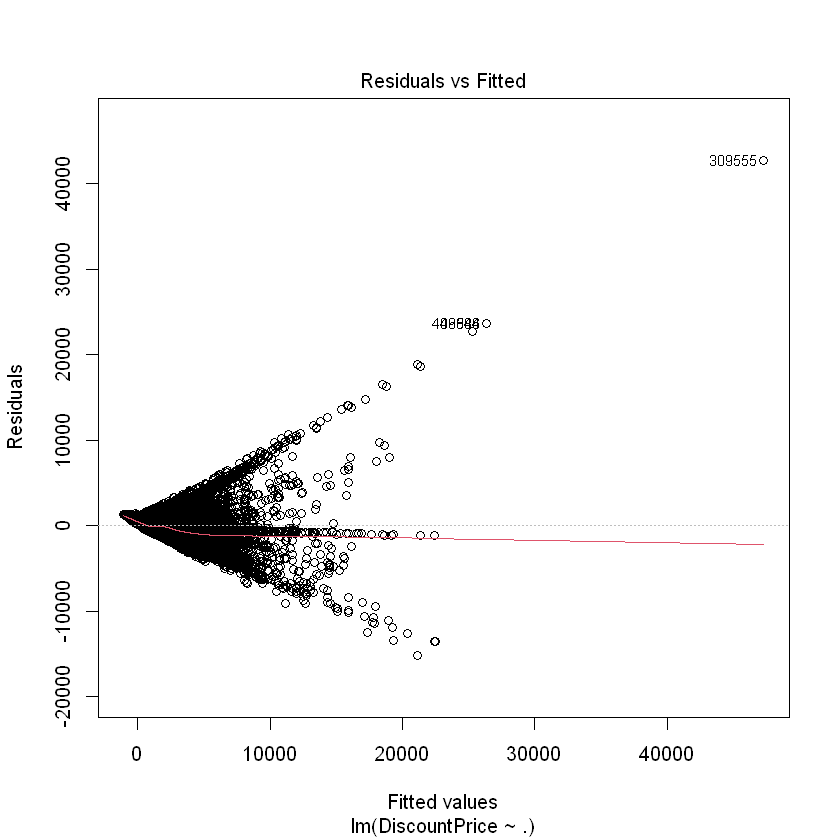

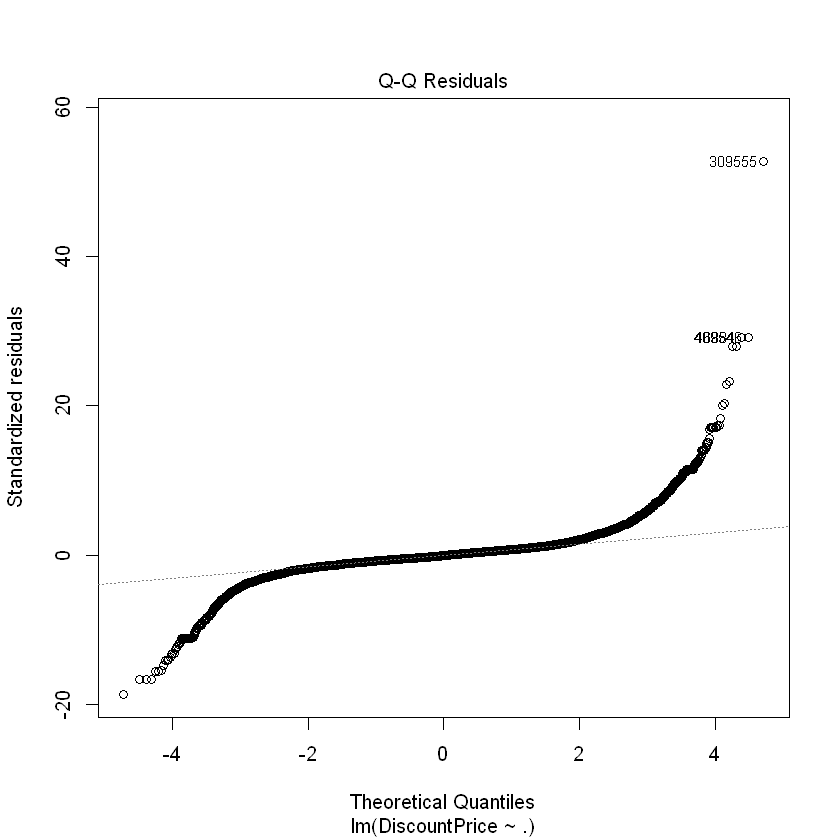

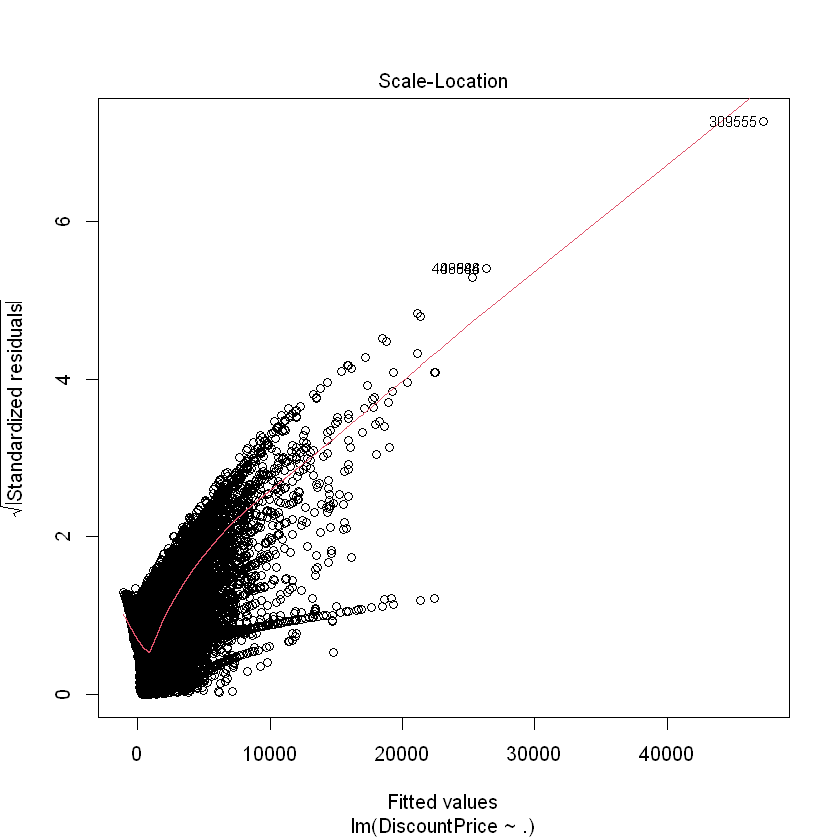

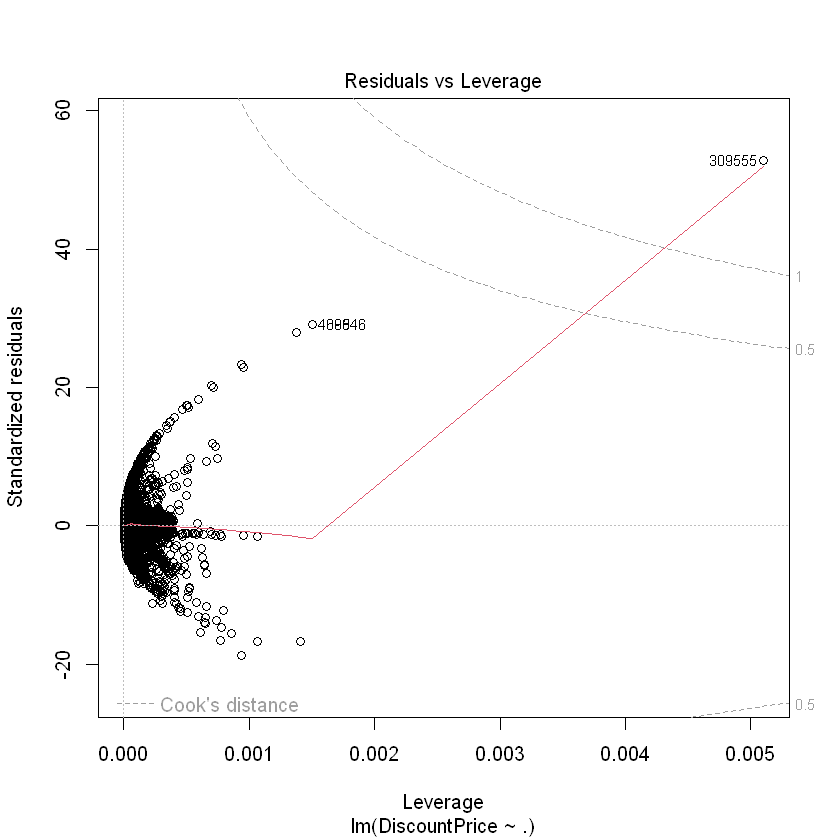

In [30]:
plot(lm_myntra)

* Residual Plot:  It is difficult to say definitively whether the assumptions of the linear model have been met.  There appears to be a slight trend in the residuals, with positive residuals at lower fitted values and negative residuals at higher fitted values. This could indicate that the linear model is not capturing the relationship between the discount price and the feature variables very well.
* Q-Q Plot: In the Q-Q plot, the points deviate from the straight line, particularly for the lower and upper quantiles of the residuals. This suggests that the residuals are not normally distributed. The data is very skewed and has a lot of outliers. There appears to be a heavier tail on both ends of the distribution than would be expected in a normal distribution. This could indicate that the linear model is not capturing the relationship between the discount price and the feature variables very well.
* Scale-Location PLot: In this plot, it appears that the variance of the residuals might be increasing slightly with increasing fitted values. This suggests that the linear model might not have constant variance.
* Residual Vs Leverage Plot: there appears to be a slight trend in the residuals, with positive residuals at lower fitted values and negative residuals at higher fitted values.

In [31]:
myntra_fashion_subset_test <- subset(test, select = -c(Product_id, BrandName, Individual_category))
head(myntra_fashion_subset_test)

Category,category_by_Gender,DiscountPrice,OriginalPrice,DiscountOffer,Ratings,Reviews
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,824,1499,3.002001,3.9,999
4,1,564,599,5.843072,4.2,999
1,0,2749,2749,0.000000,3.5,996
6,1,696,1699,3.472631,4.2,995
4,1,1449,1499,3.335557,4.2,993
4,1,1548,1598,3.128911,4.2,990


### Calculating MSPE values for each model

In [32]:
calculate_MSPE <- function(model, test_data) {
  predictions <- predict(model, newdata = test_data)
  return(mean((test_data$DiscountPrice - predictions)^2))
}

In [33]:
temp_mspe <- calculate_MSPE(updated_lm_myntra, myntra_fashion_subset_test) # MSPE for model with 5 features
temp_mspe

[1] 709491.1

In [34]:
temp_mspe <- calculate_MSPE(updated_lm_myntra_2, myntra_fashion_subset_test)# MSPE for model with 4 features
temp_mspe

[1] 715233.6

In [35]:
temp_mspe <- calculate_MSPE(lm_myntra, myntra_fashion_subset_test)# MSPE for model with 6 features
temp_mspe

[1] 663293.5

* 715233.647652179 This is the MSPE for model with 4 features
* 663293.548101405 This is the MSPE for model with 6 features
* 709491.144712724 This is the MSPE for model with 5 features

  we can see that all the MSPE values arereally high, but one possible reason for this high MSPE could be the huge dataset of approx 5 lakh rows. Apart from that we can say the the model with 6 feature variables give the best model. The model with 6 feature variables has comparitively less MSPE value than the other model' MSPE value.

# Tranforming the data

Here we are transforming out dataset. We are applying the squareroot transformation.

In [36]:
myntra_fashion_subset$Category_transformed <-  sqrt(myntra_fashion_subset$Category)
myntra_fashion_subset$category_by_Gender_transformed <-  sqrt(myntra_fashion_subset$category_by_Gender)
myntra_fashion_subset$DiscountPrice_transformed <-  sqrt(myntra_fashion_subset$DiscountPrice)
myntra_fashion_subset$OriginalPrice_transformed <-  sqrt(myntra_fashion_subset$OriginalPrice)
myntra_fashion_subset$DiscountOffer_transformed <-  sqrt(myntra_fashion_subset$DiscountOffer)
myntra_fashion_subset$Ratings_transformed <-  sqrt(myntra_fashion_subset$Ratings)
myntra_fashion_subset$Reviews_transformed <-  sqrt(myntra_fashion_subset$Reviews)

In [37]:
lm_myntra_transformed <- lm(DiscountPrice_transformed ~ Reviews_transformed +Ratings_transformed+DiscountOffer_transformed+OriginalPrice_transformed+category_by_Gender_transformed+Category_transformed, data = myntra_fashion_subset)
summary(lm_myntra_transformed)


Call:
lm(formula = DiscountPrice_transformed ~ Reviews_transformed + 
    Ratings_transformed + DiscountOffer_transformed + OriginalPrice_transformed + 
    category_by_Gender_transformed + Category_transformed, data = myntra_fashion_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.850  -5.260  -0.038   5.777 107.053 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    11.5441030  0.3170438   36.41   <2e-16 ***
Reviews_transformed            -0.0550292  0.0037910  -14.52   <2e-16 ***
Ratings_transformed             3.6991058  0.1540423   24.01   <2e-16 ***
DiscountOffer_transformed      -2.5312848  0.0096502 -262.30   <2e-16 ***
OriginalPrice_transformed       0.6046812  0.0007859  769.39   <2e-16 ***
category_by_Gender_transformed  4.6556745  0.0286674  162.40   <2e-16 ***
Category_transformed           -4.7804624  0.0274135 -174.38   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.'

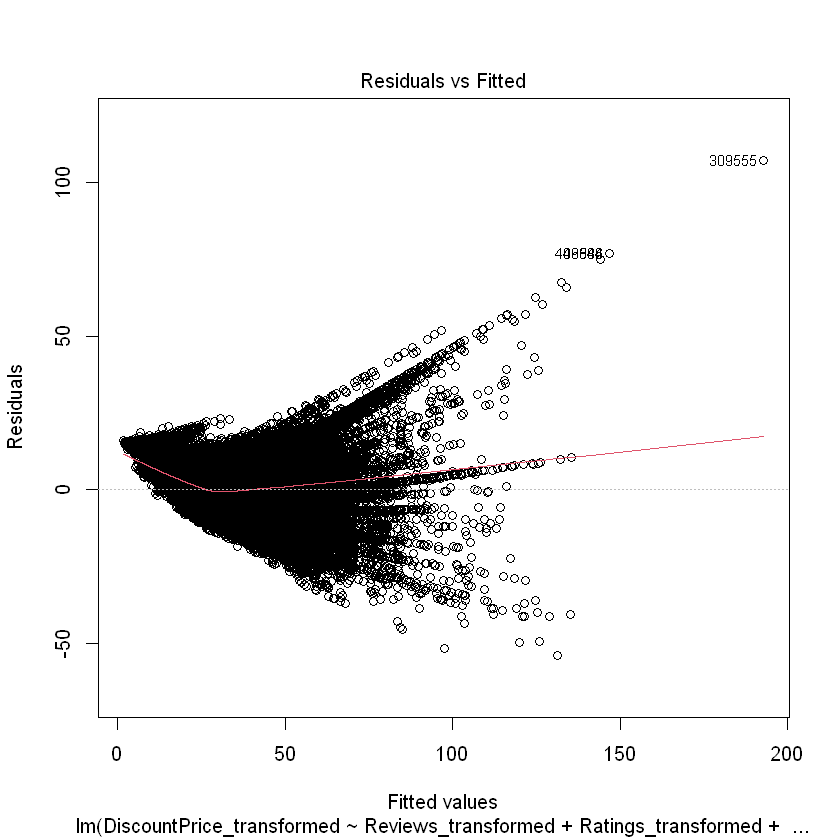

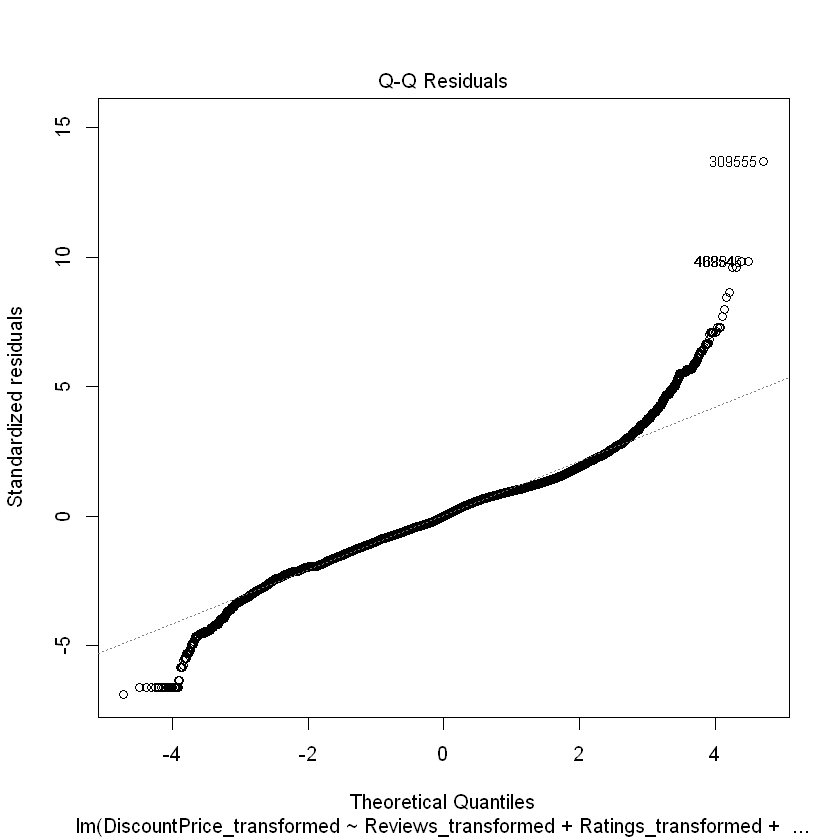

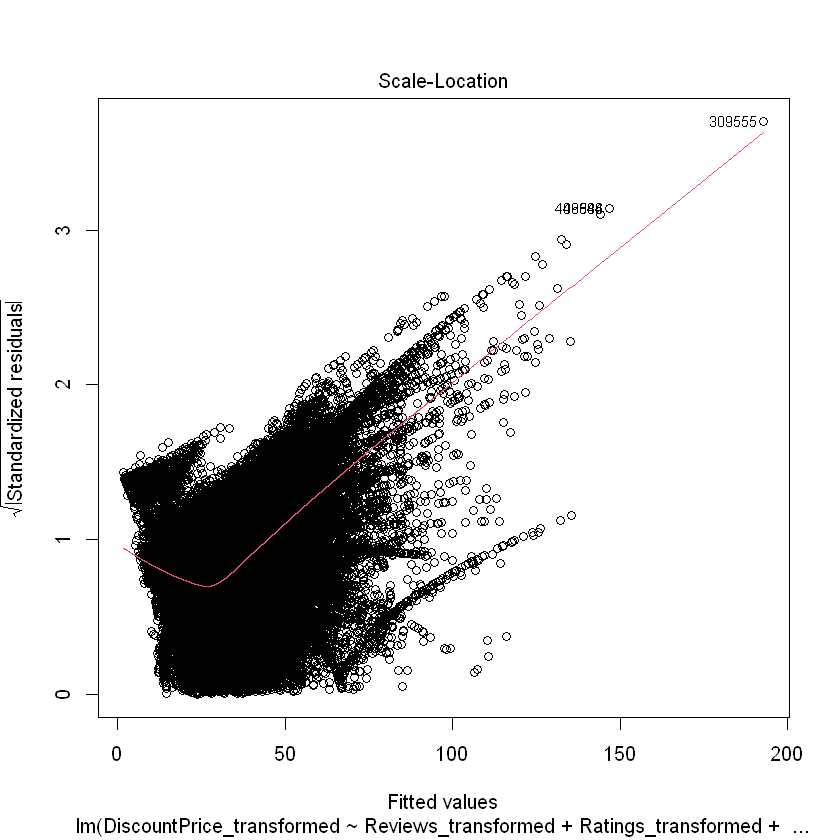

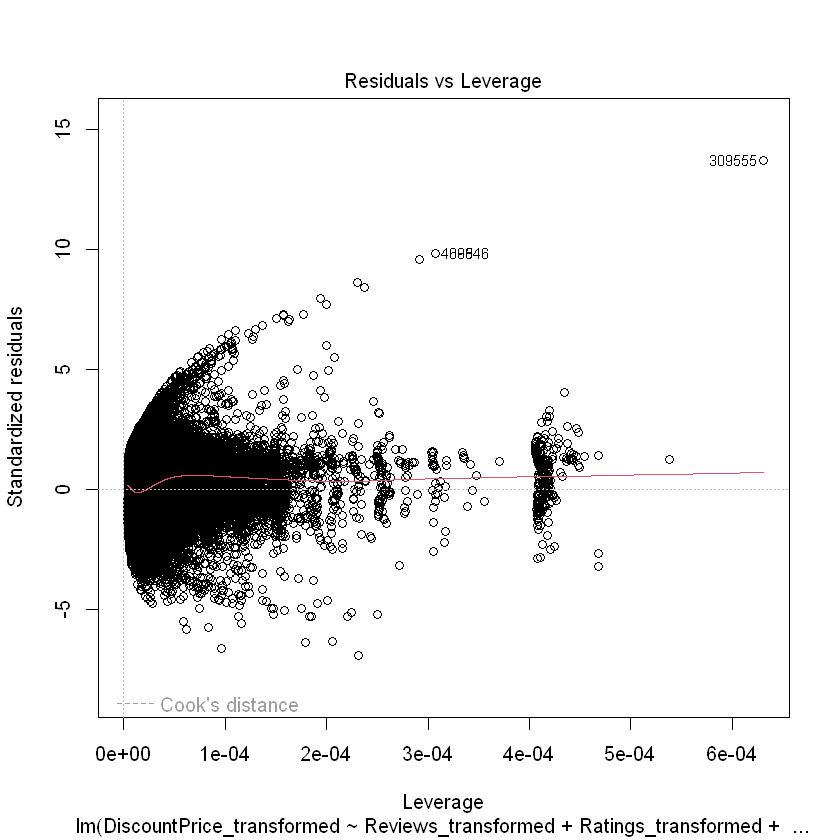

In [38]:
plot(lm_myntra_transformed) # diagnostic plots

* Residual Plot:  the residuals appear to be scattered somewhat randomly around the horizontal line at y=0. There is a slight trend where the residuals seem to be more positive for higher fitted values, but it is not a strong trend. This suggests that the linear model might be doing a decent job of capturing the relationship between the transformed discount price and the feature variables. However, there might still be a slight violation of the assumption of homoscedasticity.
* Q-Q Plot: In the Q-Q plot, the points deviate slightly from the straight line, particularly for the tails of the distribution. This suggests that the residuals are not perfectly normal. However, the deviation is not severe as compared to the un-transformed data, and it can be acceptable for linear regression.
* Scale-Location PLot: In this plot, the residuals appear to be scattered somewhat randomly around the red line. There is a slight trend where the residuals seem to have a larger spread for higher fitted values, but it is not a strong trend. This suggests that the linear model might not have perfect homoscedasticity, but the violation might be mild.
* Residual Vs Leverage Plot: the standardized residuals appear to be scattered somewhat randomly around the horizontal line at y=0. This suggests that the linear model might be doing a decent job of capturing the relationship between the transformed discount price and the feature variables. However, there might still be a slight violation of the assumption of homoscedasticity.

# Part D: Forward Selection and Model selection

In [39]:


reg1 = regsubsets(DiscountPrice_transformed ~ Reviews_transformed +Ratings_transformed+DiscountOffer_transformed+OriginalPrice_transformed+category_by_Gender_transformed+Category_transformed, data = myntra_fashion_subset)
rs = summary(reg1)
rs$which

,(Intercept),Reviews_transformed,Ratings_transformed,DiscountOffer_transformed,OriginalPrice_transformed,category_by_Gender_transformed,Category_transformed
1,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE
3,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
4,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE
5,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
6,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


The above table shows that for each size, what features will give the best model.

To choose the best size, let use the model selection criterion i.e., AIC, BIC, MSPE, $R^2$, $R_a^2$

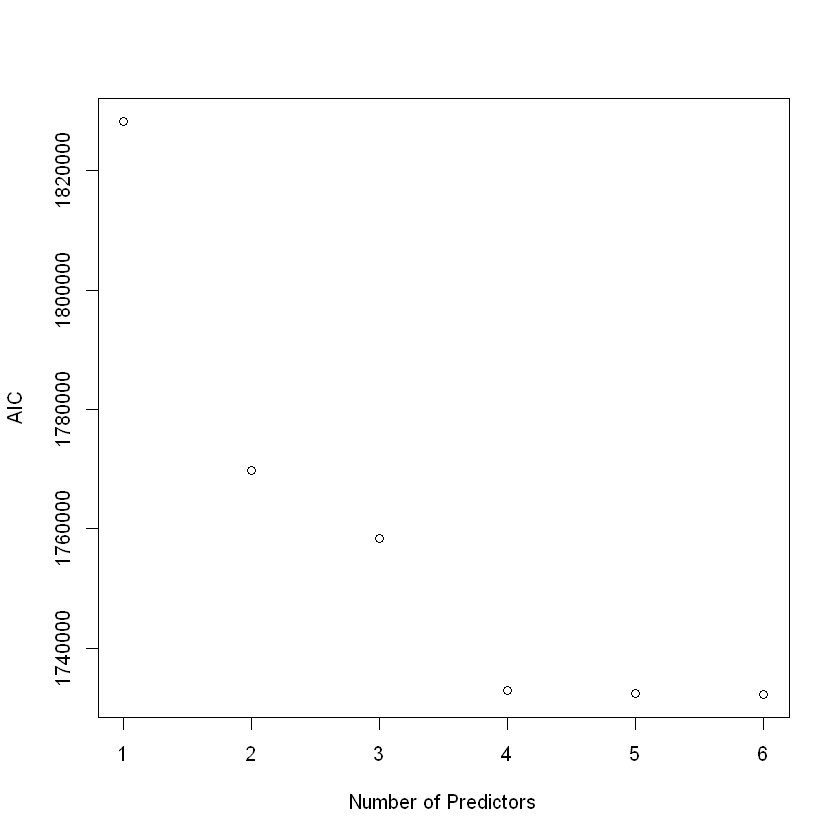

In [40]:
AIC = 2*(2:7) + n*log(rs$rss/n)
plot(AIC ~ I(1:6), xlab = "Number of Predictors", ylab = "AIC")

In this plot, we see that the model of size $k = 6$ has the lowest AIC. That means that our model selection procedure has chosen:

`discountprice` = $\widehat\beta_0 + \widehat\beta_1 \times $ `Category` $ + \widehat\beta_2 \times$ `category_by_Gender` $ + \widehat\beta_3 \times$ `OriginalPrice` $ + \widehat\beta_4 \times$ `DiscountOffer` $+ \widehat\beta_5 \times$ `Ratings` $ + \widehat\beta_4 \times$ `Reviews`.


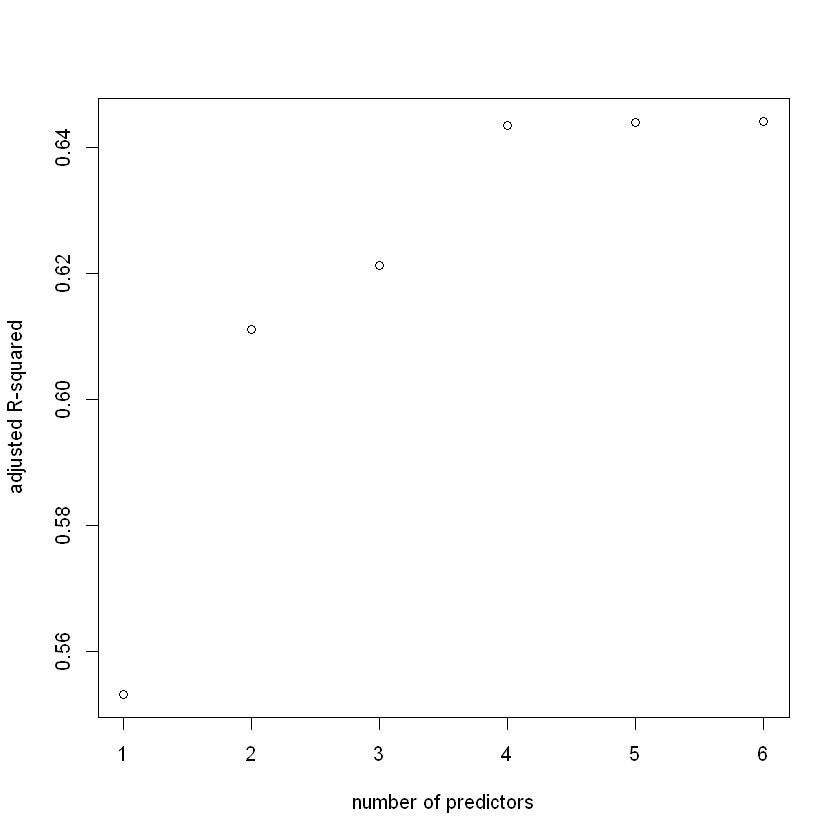

In [41]:
plot(1:6, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

In this plot, we see that the model of size $k = 6$ has the highest $R_a^2$. That means that our model selection procedure has chosen:


`discountprice` = $\widehat\beta_0 + \widehat\beta_1 \times $ `Category` $ + \widehat\beta_2 \times$ `category_by_Gender` $ + \widehat\beta_3 \times$ `OriginalPrice` $ + \widehat\beta_4 \times$ `DiscountOffer` $+ \widehat\beta_5 \times$ `Ratings` $ + \widehat\beta_4 \times$ `Reviews`.


Using the BIC formula as given below:

$$BIC\left(g\left(\mathbf{x}; \widehat{\boldsymbol\beta}\right) \right) = (p+1)\log(n) -2\log L\left(\widehat{\boldsymbol\beta} \right),$$

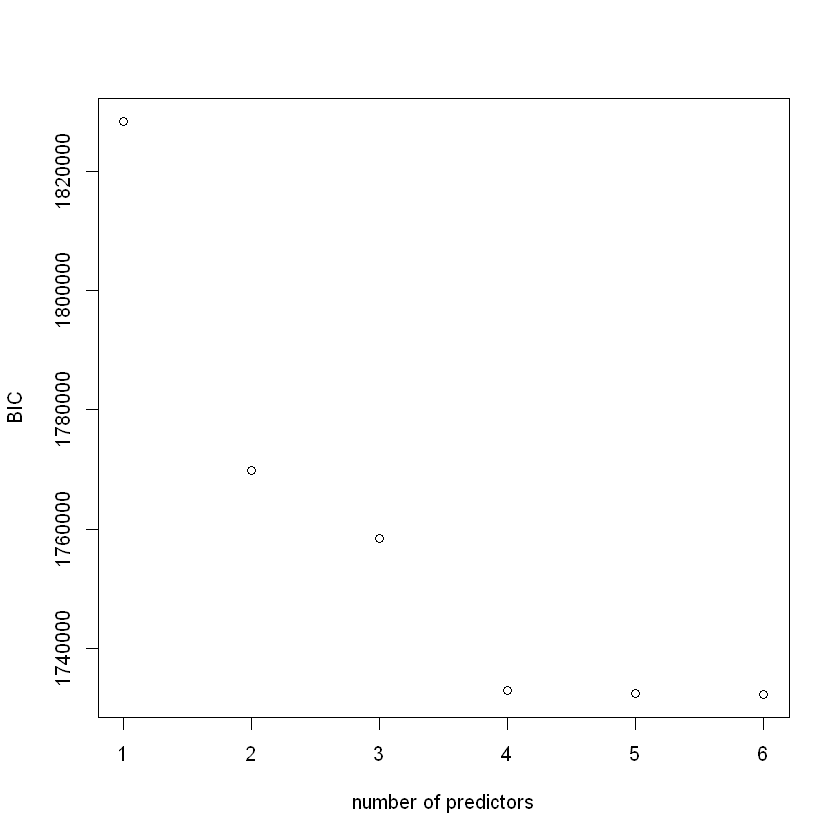

In [42]:
BIC = log(n)*(2:7) + n*log(rs$rss/n) 
plot(BIC ~ I(1:6), xlab = "number of predictors", ylab = "BIC")

In this plot, we see that the model of size $k = 6$ has the lowest BIC. That means that our model selection procedure has chosen:

`discountprice` = $\widehat\beta_0 + \widehat\beta_1 \times $ `Category` $ + \widehat\beta_2 \times$ `category_by_Gender` $ + \widehat\beta_3 \times$ `OriginalPrice` $ + \widehat\beta_4 \times$ `DiscountOffer` $+ \widehat\beta_5 \times$ `Ratings` $ + \widehat\beta_4 \times$ `Reviews`.


All the criterion give the value of $k = 6$. Thistells us the original model with all the numerical features gives the best model for linear regression

# Part E: Hypothesis Testing and ANOVA:

Let's define some hypothesis 

* **Null Hypothesis**: The Products with more reviews has more discounts.
* **Alternate Hypothesis**: There is no dependency of the reviews on the discounts

Now let's perform ANOVA to test these hypothesis.

In [43]:
anova_result <- aov(DiscountPrice ~ Reviews, data = myntra_fashion_subset)
print(anova_result)

Call:
   aov(formula = DiscountPrice ~ Reviews, data = myntra_fashion_subset)

Terms:
                     Reviews    Residuals
Sum of Squares     961756987 709683282660
Deg. of Freedom            1       421249

Residual standard error: 1297.965
Estimated effects may be unbalanced


Looking at the ANOVA results from above:

The large Sum of Squares (961756987) for Reviews compared to Residuals (709683282660) says that the number of reviews explains a substantial portion of the variance in the square root of discount prices.

Additionally, let's look at the full ANOVA table for our transformed model

In [44]:
anova_result <- anova(lm_myntra_transformed)
print(anova_result)

Analysis of Variance Table

Response: DiscountPrice_transformed
                                   Df   Sum Sq  Mean Sq    F value  Pr(>F)    
Reviews_transformed                 1    11759    11759 1.9254e+02 < 2e-16 ***
Ratings_transformed                 1      219      219 3.5895e+00 0.05815 .  
DiscountOffer_transformed           1  9230034  9230034 1.5113e+05 < 2e-16 ***
OriginalPrice_transformed           1 34988927 34988927 5.7290e+05 < 2e-16 ***
category_by_Gender_transformed      1   500008   500008 8.1870e+03 < 2e-16 ***
Category_transformed                1  1857214  1857214 3.0410e+04 < 2e-16 ***
Residuals                      421244 25726779       61                       
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


From the 1st anova results, we saw that number of reviews explains a substantial portion of the variance in the square root of discount prices.

Now the full table gives us the P-values for all the features.
All the features have a statistically significant effect on the transformed discount price at a significance level of alpha = 0.001. 
This is indicated by the highly significant p-values (Pr(>F)) much lower than 0.001, we can also see looking at the (***), 

that implies the features with the (***) indicate statistical significance.


We can, therefore say, **we failed to reject Null Hypothesis**, as there is significant eidence supporting the Null Hypothesis.

# Part F: T-test

In [45]:
t_test_category <- t.test(myntra_fashion_dataset$DiscountOffer, myntra_fashion_dataset$category_by_Gender, data = myntra_fashion_dataset, subset = category_by_Gender %in% c("Women", "Men"))
print(t_test_category)


	Welch Two Sample t-test

data:  myntra_fashion_dataset$DiscountOffer and myntra_fashion_dataset$category_by_Gender
t = 248.9, df = 529230, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.241426 3.292880
sample estimates:
mean of x mean of y 
3.9113011 0.6441477 



The t-statistic (t = 248.9) is a very large positive value, indicating a substantial difference in the means between the two categories (women's and men's).
The p-value is much smaller than 0.05, providing very strong evidence against the null hypothesis of no difference in means. There's a very high chance that this observed difference is not due to random chance.


The 95% confidence interval (3.241426, 3.292880) shows the range of values likely to contain the true difference in average discount between the categories. Since the entire interval is positive, we can be confident that the average discount for one group is higher than the other.

The average discount offered on products in the "Women" and "Men" categories is significantly different. This suggests that there might be generally higher discounts offered on the platform compared to specifically women's or men's categories.

# Report:

### **Title: Myntra Fashion Store: Data Analysis**

#### **1. Introduction/Background**
 I have always been interested in Fashion and its changing trends over the time.
The fashion industry needs thorough understanding of consumer behavior and preferences due to its fluctuating consumer trends and significant seasonal fluctuations. This study focuses on examining patterns in discount offers, product popularity, and customer reviews using data from Myntra, a well-known online apparel shop. These kinds of findings may be useful in customizing marketing plans and enhancing product offerings.

Nowadays, online shopping is the trend. People find it more convinent and time saving. Majority of the youth is dependent on the online fashion shopping. It comes with great perks like easy on budget, time saving, easy returns,etc. Online fashion retail is highly competitive, with success heavily dependent on understanding and reacting to fast-changing consumer preferences. Analyzing data from platforms like Myntra can provide insights into what influences purchase decisions, such as price, discounts, and product ratings.

This dataset is Obtained from kaggle. Reason for collecting this dataset to understand the fashion trends and analyze the prices in the fashion industry. For this analysis, the data is taken from one of the leading online fashion store MYNTRA -( https://www.myntra.com) as their data source. This is an observational study.

Let's look at some of the questions that have caught my attention on looking at the dataset.(The 3rd question always makes me curious to think about the reason.)
* Does the product reviews affect the discounts?
* How does the price range affect customer reviews and ratings?
* Is there difference between the discounts offered based on Gender?

SOme of the prior work that has been done with this dataset:
* https://anshikanishad02030.medium.com/exploring-fashion-trends-a-comprehensive-analysis-of-myntra-fashion-dataset-2ecf9af4d664
* https://github.com/aman9650/Myntra_Fashion_Clothing-EDA-Project

  We can find more such projects online

#### **2. Methods/Results (experimental design and data collection)**

The data is taken from kaggle. I directly downloaded the dataset. The 'Myntra fasion dataset' is a huge datase of approx. 526564 rows of data, with 13 columns. These columns include 'URL', 'Product_id', 'BrandName', 'Category', 'Individual_category', 'category_by_Gender', 'Description', 'DiscountPrice..in.Rs.', 'OriginalPrice..in.Rs.', 'DiscountOffer', 'SizeOption', 'Ratings' and 'Reviews'.

The dataset had many null values ad required a lot of data cleaning and data preprocessing for some columns like 'DiscountPrice..in.Rs.', 'DiscountOffer' and 'Ratings' and 'Reviews'. The data cleaning and data preprocessing is perfomed in the **Part A** of this project.

For exploratory data analysis, a correlation matrix is plotted, where we can say few features are highly correlated.(**Part A**).

For the statistical modelling, I have applied few methods and tried to answer the questions of interest.

* **Part B Regression Modelling**: This part includes a linear regression model on the obtained numerical dataset. This model seems to a good fit for now. But for further analysis,  I included Backward selection on the trained model.
* **Part C Backward Selection and Diagnostics of model**: This part includes the Backward selection on the trained model and the diagnostic plots to understand the statistical assumption. It was difficult to make a point on the assumption of linear model. Therefore, applied a squareroot transformation on the dataset and re-run the model. Although there is a slight violation of homoscedasticity and there are few outliers in the dataset, yet this transformed model seems a good fit. Here, we also applied the MSPE criterion to find the best fit model.
* **Part D Forward Selection and Model selection**: This part includes the Forward selection, here using the different criterion, namely AIC, BIC,  $R^2$, $R_a^2$, I was able to choose the best number of features to get the good fit. $K=6$ gives the best model for all the criterion
* **Part E Hypothesis Testing and ANOVA**: This part includes a Hypothesis Testing, the hypothesis states, whethere there is a dependency on discounts and review, to test this hypothesis, I used ANOVA, which clearly indicates that the there is a dependency on discounts and review.
* **Part F T-test**: This part includes a t-test to see whether the discounts vary based on gender. Using the t-test results, it can be concluded that discounts seem to vary based on gender.

  These methods have been specifically used to answer the questions of interest and to understand which features truly help determining the discountprice on a product.

#### **3. Conclusions**

This project helped me to understand how some questions in the real world can simply be asnwered using data and perfoming statistical analysis on that data. Statistical analysis provides a concrete reason on the statements/question(which are usually called hypothesis) we get. To highlight on the fashion datase analysis, we got to know that the reviews affect the discount on a product. There is a difference in the discounts offered to Men and women.


I want to extend my research on understanding the sales in the fashion industry, does the review and discounts affect the sale of a product. I also want to build a personnalized outfit recommendation  system or a dynamic price optimizer that would  optimize pricing strategies dynamically based on demand, inventory levels, and trends.